In [1]:
import csv
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import probscale

plt.style.use('ggplot')
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
import scipy.stats as stats
from sklearn import metrics
from sklearn.model_selection import KFold, train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler

In [3]:
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Reading csv file and converting into DataFrame

In [4]:
with open('dataset.csv', 'r') as f:
    reader = csv.reader(f)
    data = list(reader)

In [5]:
# Each row is a list with a single string
data[:3]

[['age;"job";"marital";"education";"default";"housing";"loan";"contact";"month";"day_of_week";"duration";"campaign";"pdays";"previous";"poutcome";"emp.var.rate";"cons.price.idx";"cons.conf.idx";"euribor3m";"nr.employed";"y"'],
 ['56;"housemaid";"married";"basic.4y";"no";"no";"no";"telephone";"may";"mon";261;1;999;0;"nonexistent";1.1;93.994;-36.4;4.857;5191;"no"'],
 ['57;"services";"married";"high.school";"unknown";"no";"no";"telephone";"may";"mon";149;1;999;0;"nonexistent";1.1;93.994;-36.4;4.857;5191;"no"']]

In [6]:
data2 = [row[0] for row in data]

In [7]:
# Split the string into the various columns
data3 = [i.split(";") for i in data2]
data3[0:2]

[['age',
  '"job"',
  '"marital"',
  '"education"',
  '"default"',
  '"housing"',
  '"loan"',
  '"contact"',
  '"month"',
  '"day_of_week"',
  '"duration"',
  '"campaign"',
  '"pdays"',
  '"previous"',
  '"poutcome"',
  '"emp.var.rate"',
  '"cons.price.idx"',
  '"cons.conf.idx"',
  '"euribor3m"',
  '"nr.employed"',
  '"y"'],
 ['56',
  '"housemaid"',
  '"married"',
  '"basic.4y"',
  '"no"',
  '"no"',
  '"no"',
  '"telephone"',
  '"may"',
  '"mon"',
  '261',
  '1',
  '999',
  '0',
  '"nonexistent"',
  '1.1',
  '93.994',
  '-36.4',
  '4.857',
  '5191',
  '"no"']]

In [8]:
df = pd.DataFrame(data3[1:], columns=data3[0])

In [9]:
df.head(5)

,age,"""job""","""marital""","""education""","""default""","""housing""","""loan""","""contact""","""month""","""day_of_week""",...,"""campaign""","""pdays""","""previous""","""poutcome""","""emp.var.rate""","""cons.price.idx""","""cons.conf.idx""","""euribor3m""","""nr.employed""","""y"""
0,56,"""housemaid""","""married""","""basic.4y""","""no""","""no""","""no""","""telephone""","""may""","""mon""",...,1,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191,"""no"""
1,57,"""services""","""married""","""high.school""","""unknown""","""no""","""no""","""telephone""","""may""","""mon""",...,1,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191,"""no"""
2,37,"""services""","""married""","""high.school""","""no""","""yes""","""no""","""telephone""","""may""","""mon""",...,1,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191,"""no"""
3,40,"""admin.""","""married""","""basic.6y""","""no""","""no""","""no""","""telephone""","""may""","""mon""",...,1,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191,"""no"""
4,56,"""services""","""married""","""high.school""","""no""","""no""","""yes""","""telephone""","""may""","""mon""",...,1,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191,"""no"""


# Cleaning up DataFrame

In [10]:
df.columns = df.columns.str.strip('""')

In [11]:
df = df.apply(lambda x: x.str.strip('""'))

In [12]:
df.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no


In [13]:
df.shape

(41188, 21)

In [14]:
# 12 duplicate observations in the dataset, which I will delete
duplicates = df[df.duplicated()]
duplicates

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191,no
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
20216,55,services,married,high.school,unknown,no,no,cellular,aug,mon,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
20534,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
25217,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,...,2,999,0,nonexistent,-0.1,93.2,-42,4.153,5195.8,no
28477,24,services,single,high.school,no,yes,no,cellular,apr,tue,...,1,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,no
32516,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,...,4,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no


In [15]:
df.drop_duplicates(inplace = True) 

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
age               41176 non-null object
job               41176 non-null object
marital           41176 non-null object
education         41176 non-null object
default           41176 non-null object
housing           41176 non-null object
loan              41176 non-null object
contact           41176 non-null object
month             41176 non-null object
day_of_week       41176 non-null object
duration          41176 non-null object
campaign          41176 non-null object
pdays             41176 non-null object
previous          41176 non-null object
poutcome          41176 non-null object
emp.var.rate      41176 non-null object
cons.price.idx    41176 non-null object
cons.conf.idx     41176 non-null object
euribor3m         41176 non-null object
nr.employed       41176 non-null object
y                 41176 non-null object
dtypes: object(21)
memory usage: 6.9+ MB


# Numeric data analysis

In [17]:
# Converting the numeric data
cols = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx',
        'cons.conf.idx', 'euribor3m', 'nr.employed']

In [18]:
df[cols] = df[cols].astype('float')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
age               41176 non-null float64
job               41176 non-null object
marital           41176 non-null object
education         41176 non-null object
default           41176 non-null object
housing           41176 non-null object
loan              41176 non-null object
contact           41176 non-null object
month             41176 non-null object
day_of_week       41176 non-null object
duration          41176 non-null float64
campaign          41176 non-null float64
pdays             41176 non-null float64
previous          41176 non-null float64
poutcome          41176 non-null object
emp.var.rate      41176 non-null float64
cons.price.idx    41176 non-null float64
cons.conf.idx     41176 non-null float64
euribor3m         41176 non-null float64
nr.employed       41176 non-null float64
y                 41176 non-null object
dtypes: float64(10), object(11)
memory us

In [20]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,258.315815,2.567879,962.464810,0.173013,0.081922,93.575720,-40.502863,3.621293,5167.034870
std,10.42068,259.305321,2.770318,186.937102,0.494964,1.570883,0.578839,4.627860,1.734437,72.251364
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [21]:
# The max 'duration' value seems incredible. Let's see how many people spoke for more than 1 hour to check if there are...
# possible errors in the dataset.
# Well, the other variables' values seem fine, so it looks legit.
df[['age', 'job', 'education', 'duration', 'campaign', 'marital', 'y']][df.duration > 3600]

,age,job,education,duration,campaign,marital,y
7727,37.0,unemployed,professional.course,3631.0,2.0,married,yes
13820,31.0,technician,professional.course,3643.0,1.0,married,yes
22192,52.0,blue-collar,basic.4y,4199.0,3.0,married,yes
24091,33.0,technician,professional.course,4918.0,1.0,single,no
40537,27.0,admin.,high.school,3785.0,1.0,single,no


#### All the numeric variables look fine, except for 'pdays' with the max reading of 999

In [22]:
# 999 should perhaps be encoded as 0 instead
df.pdays.unique()

array([999.,   6.,   4.,   3.,   5.,   1.,   0.,  10.,   7.,   8.,   9.,
        11.,   2.,  12.,  13.,  14.,  15.,  16.,  21.,  17.,  18.,  22.,
        25.,  26.,  19.,  27.,  20.])

In [23]:
# Overwhelming majority of clients in dataset have never been contacted before
df.pdays.value_counts()

999.0    39661
3.0        439
6.0        412
4.0        118
9.0         64
2.0         61
7.0         60
12.0        58
10.0        52
5.0         46
13.0        36
11.0        28
1.0         26
15.0        24
14.0        20
8.0         18
0.0         15
16.0        11
17.0         8
18.0         7
19.0         3
22.0         3
21.0         2
27.0         1
25.0         1
20.0         1
26.0         1
Name: pdays, dtype: int64

In [24]:
df['pdays'] = df.pdays.map(lambda x: 0 if x == 999 else x)

In [25]:
df.pdays.describe()

count    41176.000000
mean         0.221294
std          1.349065
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         27.000000
Name: pdays, dtype: float64

In [26]:
# Somewhat more contact history in 'previous' than in 'pdays'
df.previous.value_counts()

0.0    35551
1.0     4561
2.0      754
3.0      216
4.0       70
5.0       18
6.0        5
7.0        1
Name: previous, dtype: int64

In [27]:
df.y.value_counts()

no     36537
yes     4639
Name: y, dtype: int64

In [28]:
# Changing the target variable into numeric
df['target'] = df.y.map(lambda x: 1 if x == 'yes' else 0)

In [29]:
# Success rate is 11.27%
df.target.value_counts()

0    36537
1     4639
Name: target, dtype: int64

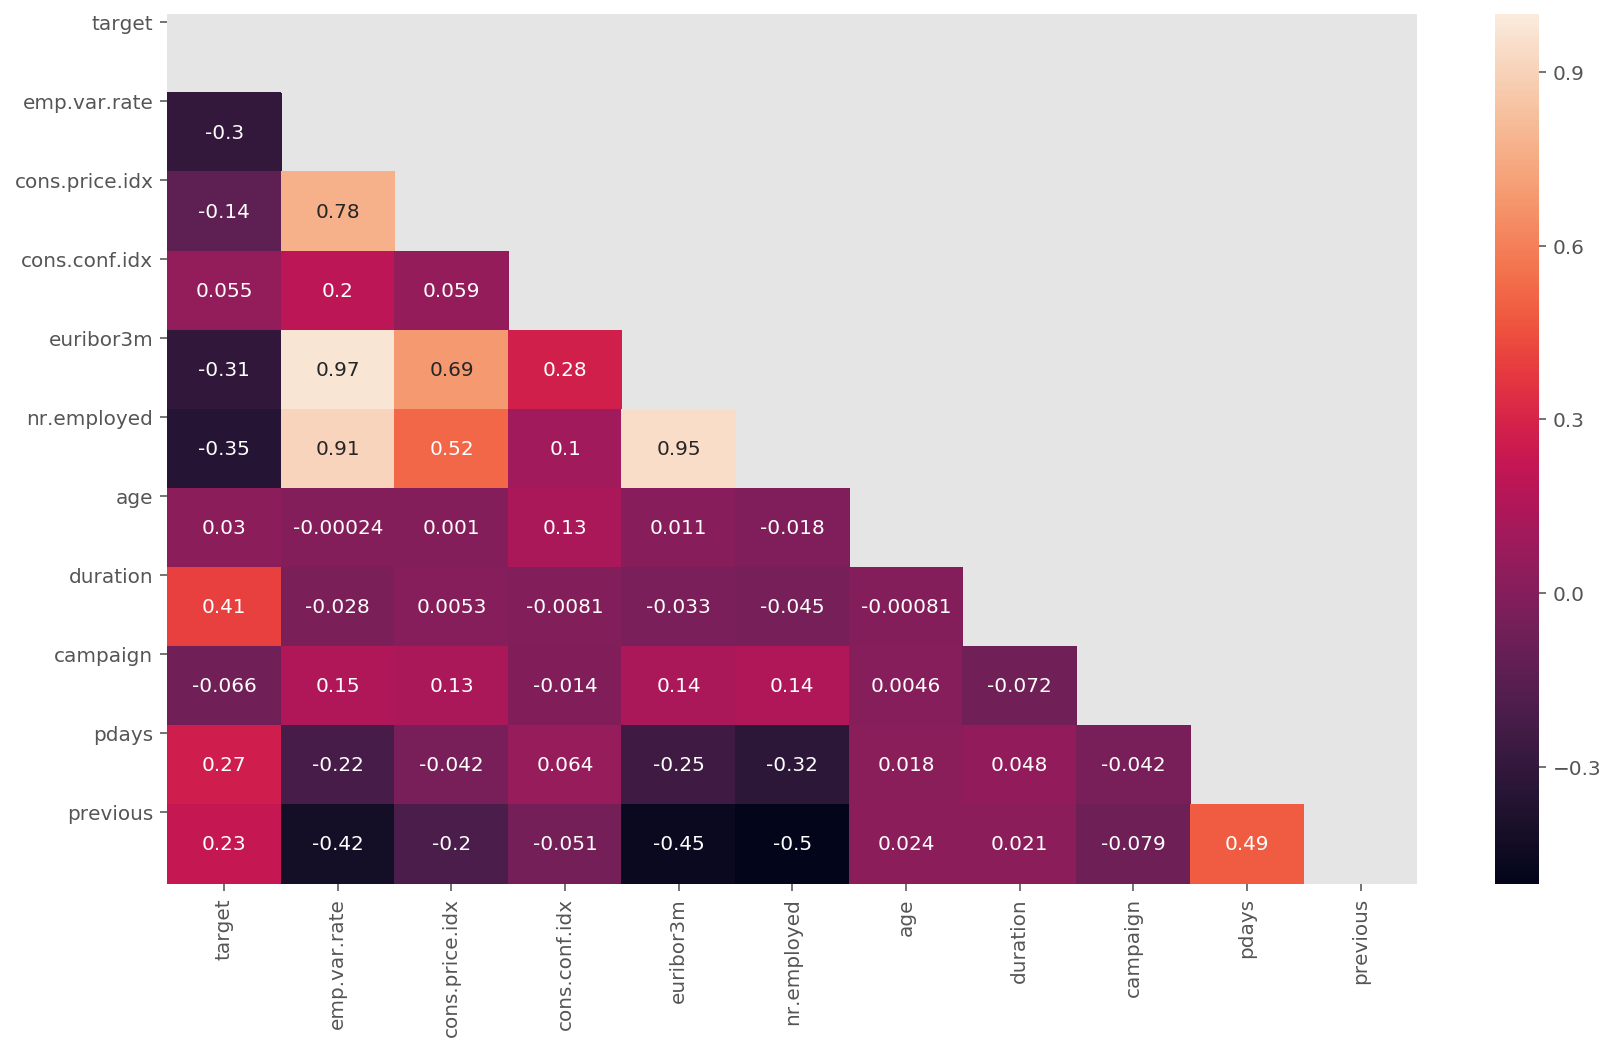

In [30]:
# Take a look at the correlation matrix for the numeric variables
M = df[['target', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'age', 'duration', 'campaign', 'pdays', 'previous']]

fig, ax = plt.subplots(figsize=(14, 8))

mask = np.zeros_like(M.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(M.corr(), mask=mask, annot=True, ax=ax)
ax.set_yticks(np.arange(0, df.shape[1])+0.1)
ax.set_ylim([M.shape[1], 0])
plt.show()

#### Very high positive correlation between many of the macroeconomic variables, especially 'emp.var.rate', 'nr.employed' &  'euribor3m'. Using just one of them is advisable to minimise multicollinearity. Best to use 'euribor3m' as the level of the risk-free interest rate is likely to affect people's propensity to take up bank term deposits. The level of the inflation index, 'cons.price.idx', is also highly correlated to 'euribor3m', which is expected. But 'cons.conf.idx' is not as well correlated with the others. So let's pick 'euribor3m' and 'cons.conf.idx' as potential explanatory variables from among the macroeconomic variables.

#### 'pdays' has moderate positive correlation with 'target', meaning if the client had been contacted in a previous campaign, the more days that has passed since until the latest (current) campaign contact raise the probability of a successful subscription. 'previous' also has a moderate positive correlation, so the more contacts with the client before the latest campaign raises the probability of a subscription. There is a relatively high correlation between 'pdays' and 'previous', and I will therefore just use the 'previous' variable because it has more observations of client contact. Interestingly, 'campaign', which is the number of contacts during the current campaign, had little correlation to the subscription success rate.

#### 'duration' of the phone conversation in the current campaign has the highest correlation to 'target', and is positive, meaning that the longer the phone conversation with the client in this current campaign, the higher the probability of a successful subscription. Naturally, an interested client will be more willing to discuss taking up term deposits, and such a client will also be more likely to actually subscribe ultimately. A commercial-minded predictive model should probably not include 'duration' because it is a variable whose outcome cannot be estimated independently of the target variable beforehand. The alternative argument is that 'duration' might reflect the caller's ability to engage the client, which would then lead to a higher probability of a subscription. But if this view is valid, then it is better to use a variable that measures a caller's ability directly, perhaps the caller's success rate in previous campaigns. I think that a realistic predictive model should exclude the 'duration' variable.

In [31]:
# Let's look at some summary statistics for 'duration'
# The two distributions between target=1 and target=0 are different
df.groupby('target')['duration'].agg(['mean', 'std', 'count'])

,mean,std,count
target,,,
0,220.868079,207.116178,36537
1,553.256090,401.190736,4639


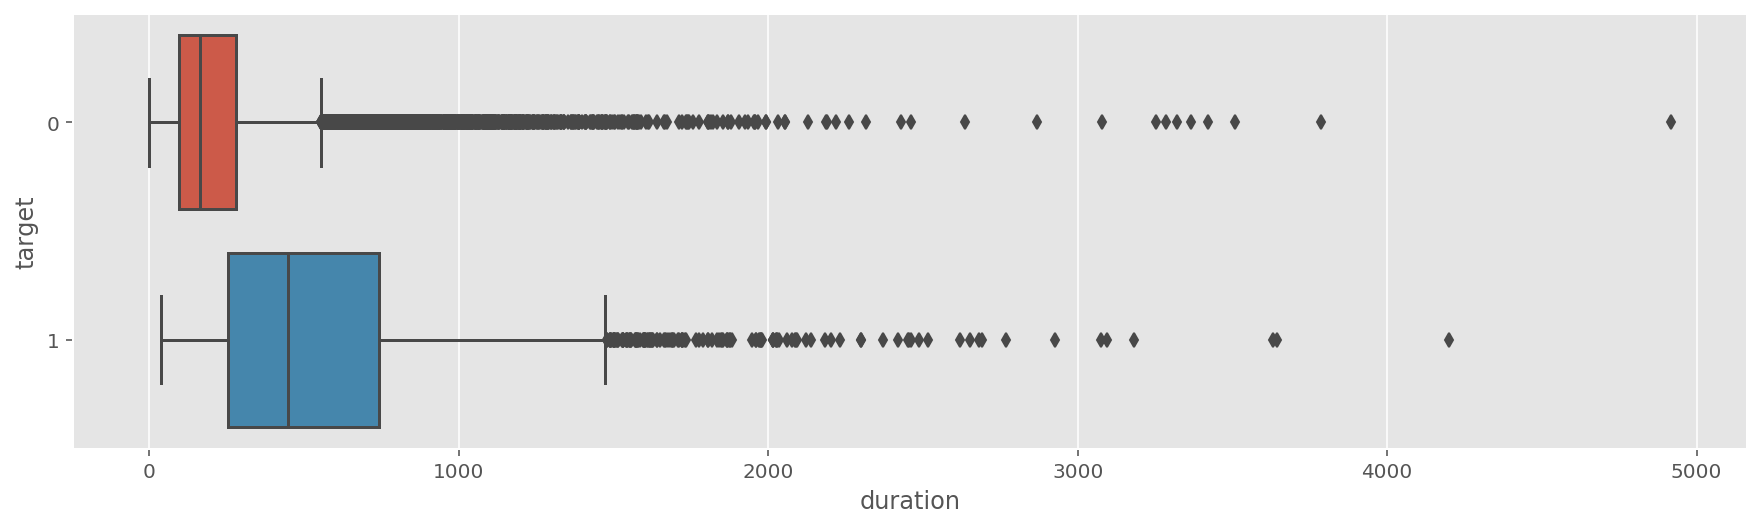

In [32]:
plt.figure(figsize=(15,4))
sns.boxplot(x='duration', y='target', data=df, orient='h');

In [33]:
# t-test shows that the two distribution of 'duration' are statistically distinct from each other
stats.ttest_ind(df.duration[df.target == 0], df.duration[df.target == 1])

Ttest_indResult(statistic=-89.96034866049264, pvalue=0.0)

# Non-numeric variables

In [34]:
df.job.unique()

array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed', 'unknown',
       'entrepreneur', 'student'], dtype=object)

In [35]:
job_proportion = ((df.target[df.target == 1].groupby(df.job).count())/(df.target[df.target == 0].groupby(df.job).count()))*100

In [36]:
# Subscription success rates by job category
job_proportion

job
admin.           14.898544
blue-collar       7.405688
entrepreneur      9.309309
housemaid        11.111111
management       12.634823
retired          33.800623
self-employed    11.713836
services          8.863886
student          45.833333
technician       12.148444
unemployed       16.551724
unknown          12.627986
Name: target, dtype: float64

#### 'blue-collar' has notably the lowest success rate, while 'student' and 'retired' have notably higher sucess rates, along with 'unemployed' as a distant third. Probably useful to use these 4 job categories as dummies in the model.

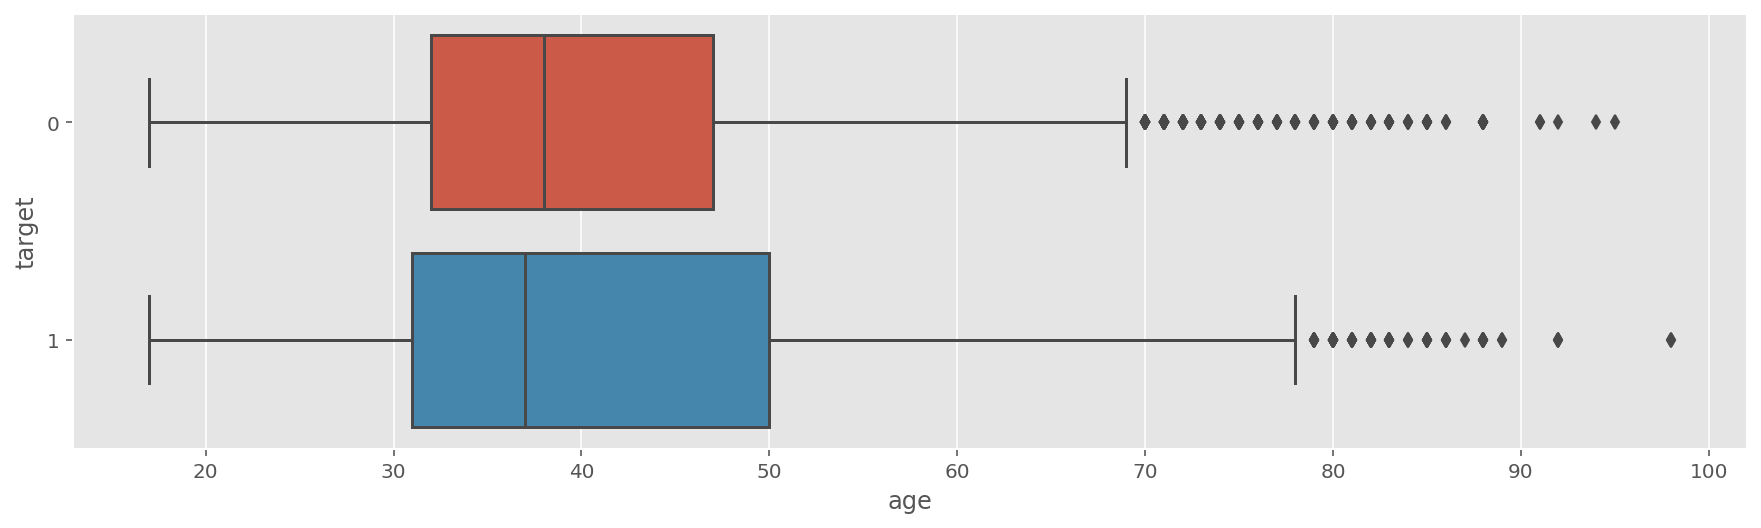

In [37]:
# There appears to be a greater success rate among older clients
plt.figure(figsize=(15,4))
sns.boxplot(x='age', y='target', data=df, orient='h');

In [38]:
# There is little correlation between the success rate and age for the overall dataset
df.age.corr(df.target)

0.030380536219875937

In [39]:
# But there is a good positive correlation between age and the success rate among retirees
df['age'][df.job == 'retired'].corr(df.target)

0.3450014260768644

In [40]:
# Also a decent negative correlation between age and the success rate among student
df['age'][df.job == 'student'].corr(df.target)

-0.14858666506737794

In [41]:
# No such pattern among the unemployed...
df['age'][df.job == 'unemployed'].corr(df.target)

-0.029482589348120897

In [42]:
# nor among blue-collar workers
df['age'][df.job == 'blue-collar'].corr(df.target)

-0.010950005078692825

#### This success the use of interaction variables between job dummies for 'retired' and 'student' and 'age' could prove fruitful for predicting success.

In [43]:
df.marital.value_counts()

married     24921
single      11564
divorced     4611
unknown        80
Name: marital, dtype: int64

In [44]:
marital_proportion = ((df.target[df.target == 1].groupby(df.marital).count())/(df.target[df.target == 0]
                                                                               .groupby(df.marital).count()))*100

In [45]:
# 'single' category has notably higher subscription rate, so let's have a dummy for that
marital_proportion

marital
divorced    11.511487
married     11.304154
single      16.291231
unknown     17.647059
Name: target, dtype: float64

In [46]:
# Extremely few cases of defaults
df.default.value_counts()

no         32577
unknown     8596
yes            3
Name: default, dtype: int64

In [47]:
default_proportion = ((df.target[df.target == 1].groupby(df.default).count())/(df.target[df.target == 0]
                                                                               .groupby(df.default).count()))*100

In [48]:
# Let's have a dummy variable for no defaults
default_proportion

default
no         14.784539
unknown     5.433583
yes              NaN
Name: target, dtype: float64

In [49]:
df.housing.value_counts()

yes        21571
no         18615
unknown      990
Name: housing, dtype: int64

In [50]:
housing_proportion = ((df.target[df.target == 1].groupby(df.housing).count())/(df.target[df.target == 0]
                                                                               .groupby(df.housing).count()))*100

In [51]:
housing_proportion

housing
no         12.206148
unknown    12.117780
yes        13.150441
Name: target, dtype: float64

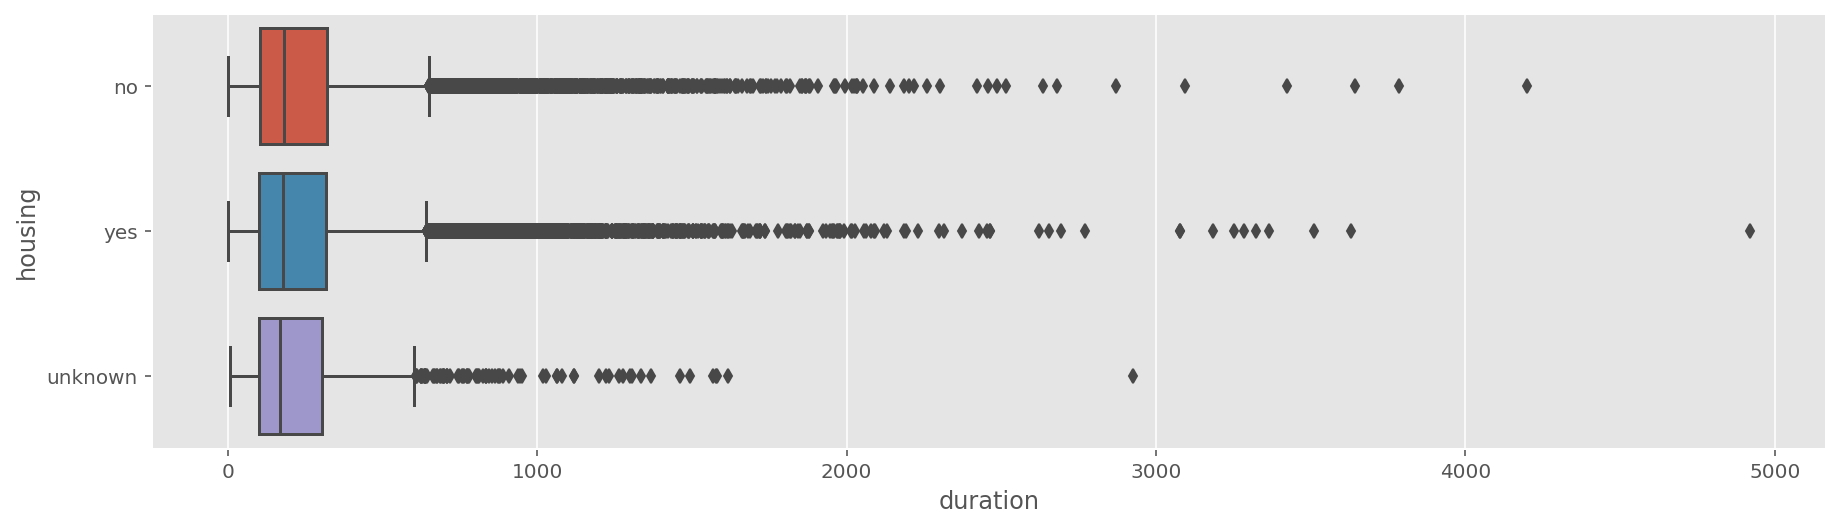

In [52]:
# Using 'duration' as a continuous proxy for the target variable, we see little discernible difference in the housing loan 
# distributions
plt.figure(figsize=(15,4))
sns.boxplot(x='duration', y='housing', data=df, orient='h');

In [53]:
# Extremely few cases of defaults
df.loan.value_counts()

no         33938
yes         6248
unknown      990
Name: loan, dtype: int64

In [54]:
loan_proportion = ((df.target[df.target == 1].groupby(df.loan).count())/(df.target[df.target == 0]
                                                                               .groupby(df.loan).count()))*100

In [55]:
# No discernible effect from 'loan' variable
loan_proportion

loan
no         12.792050
unknown    12.117780
yes        12.273136
Name: target, dtype: float64

#### So far, I've identified the following potential explanatory variables: 
'euribor3m', 
'cons.conf.idx', 
'age', 
blue-collar dummy, 
student dummy, 
retired dummy, 
unemployed dummy, 
retired-age interaction variable, 
student-age interaction variable, 
marital single dummy, 
no credit default dummy.

# Feature engineering

### Creating new variables, mostly dummy variables

In [56]:
# Creating a dummy variable for blue-collar workers
df['blue_collar'] = df.job.apply(lambda x: 1 if x=='blue-collar' else 0)

In [57]:
# Creating a dummy variable for students
df['student'] = df.job.apply(lambda x: 1 if x=='student' else 0)

In [58]:
# Creating a dummy variable for retirees
df['retiree'] = df.job.apply(lambda x: 1 if x=='retired' else 0)

In [59]:
# Creating a dummy variable for unemployed
df['unemployed'] = df.job.apply(lambda x: 1 if x=='unemployed' else 0)

In [60]:
# Creating a dummy variable for singles
df['single'] = df.marital.apply(lambda x: 1 if x=='single' else 0)

In [61]:
# Creating a dummy variable for no credit default
df['no_default'] = df.default.apply(lambda x: 1 if x=='no' else 0)

In [62]:
df['age_student'] = df.age*df.student

In [63]:
df['age_retiree'] = df.age*df.retiree

In [64]:
df[['blue_collar', 'student', 'retiree', 'unemployed', 'single', 'no_default']].describe()

,blue_collar,student,retiree,unemployed,single,no_default
count,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,0.224718,0.021250,0.041723,0.024626,0.280843,0.791165
std,0.417402,0.144219,0.199959,0.154984,0.449417,0.406481
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [65]:
# Numbers above for the job dummies align, so the dummification was correct
df.job.value_counts()

admin.           10419
blue-collar       9253
technician        6739
services          3967
management        2924
retired           1718
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

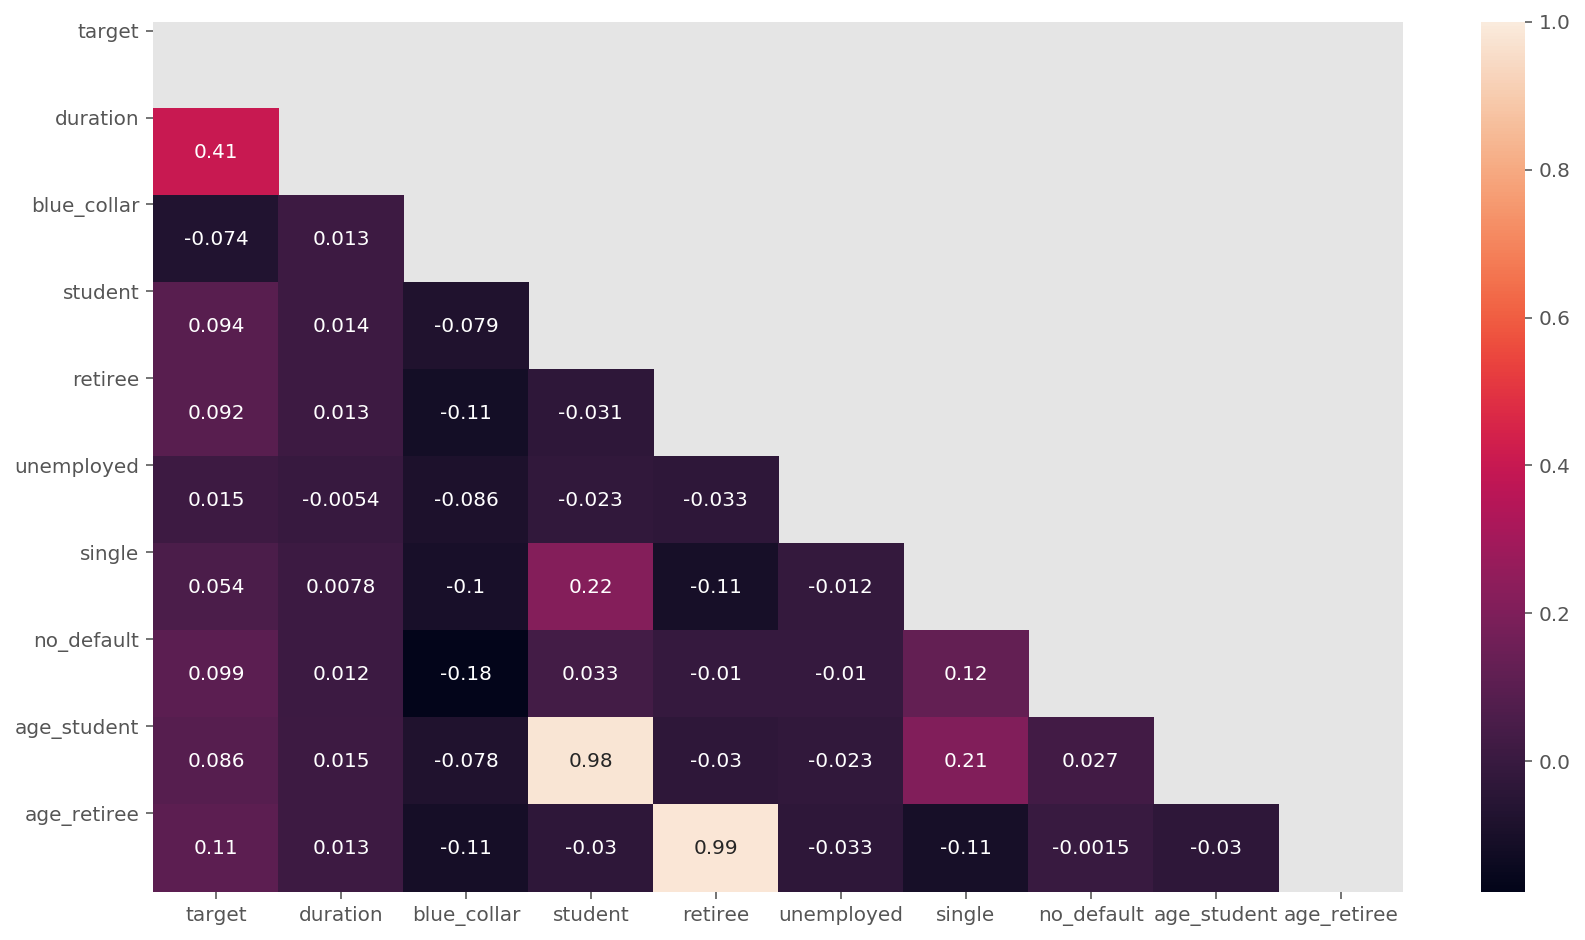

In [66]:
# Take a look at the correlation matrix for the new variables
W = df[['target', 'duration', 'blue_collar', 'student', 'retiree', 'unemployed', 'single', 'no_default', 
        'age_student', 'age_retiree']]

fig, ax = plt.subplots(figsize=(14, 8))

mask = np.zeros_like(W.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(W.corr(), mask=mask, annot=True, ax=ax)
ax.set_yticks(np.arange(0, df.shape[1])+0.1)
ax.set_ylim([W.shape[1], 0])
plt.show()

#### The correlations tend to be low for these new set of mostly dummy variables, apart from the two interaction variables, which would be expected. The highest correlation is between 'target' and 'duration' at +0.41, which we have already seen previously. After that it's a couple of correlations in the low 0.20s, between the 'single' dummy and the two 'student' variables.

### Dummifying the rest of the variables

In [67]:
df = pd.get_dummies(df, columns=['contact'], drop_first=True)

In [68]:
df = pd.get_dummies(df, columns=['month'], drop_first=True)

In [69]:
df = pd.get_dummies(df, columns=['day_of_week'], drop_first=True)

In [70]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y',
       'target', 'blue_collar', 'student', 'retiree', 'unemployed', 'single',
       'no_default', 'age_student', 'age_retiree', 'contact_telephone',
       'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'month_sep', 'day_of_week_mon',
       'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed'],
      dtype='object')

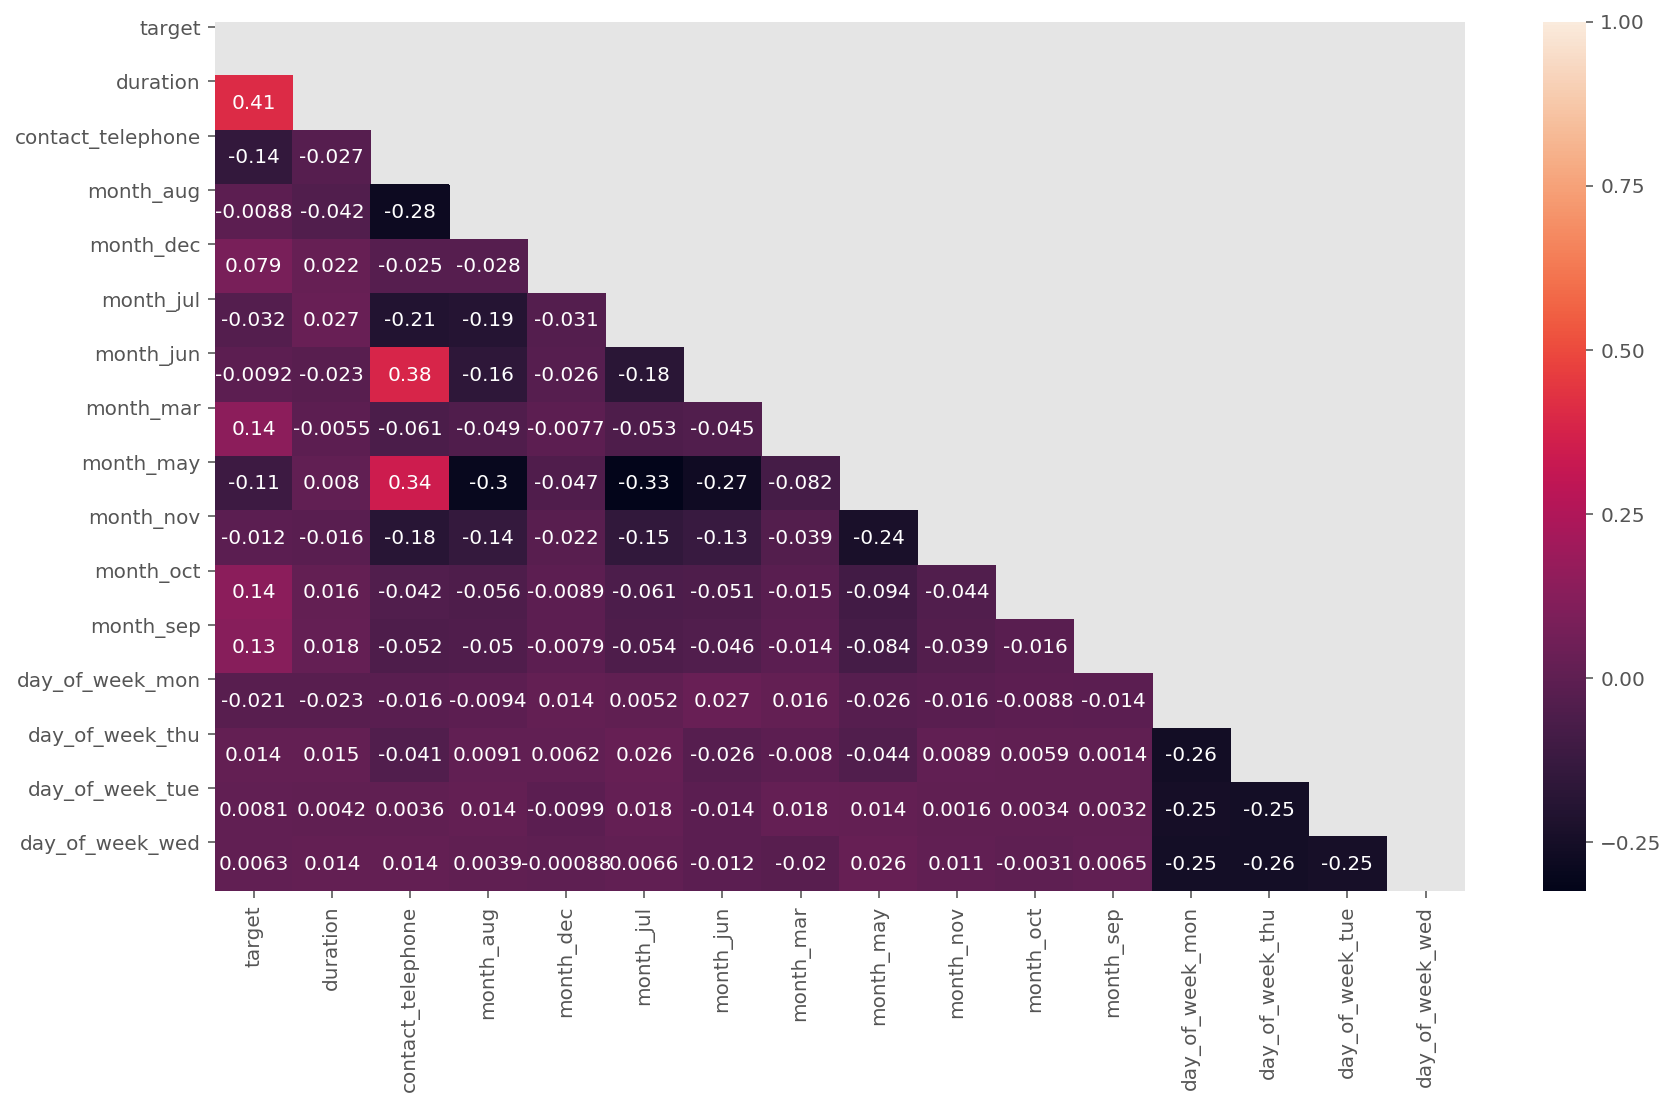

In [71]:
# Take a look at the correlation matrix for the new variables
Q = df[['target', 'duration', 'contact_telephone', 'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar',
        'month_may', 'month_nov', 'month_oct', 'month_sep', 'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue', 
        'day_of_week_wed']]

fig, ax = plt.subplots(figsize=(14, 8))

mask = np.zeros_like(Q.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(Q.corr(), mask=mask, annot=True, ax=ax)
ax.set_yticks(np.arange(0, df.shape[1])+0.1)
ax.set_ylim([Q.shape[1], 0])
plt.show()

#### The correlations tend to be low for these remaining set of variables. The highest correlation is again between 'target' and 'duration'. After that it's a handful of correlations in the 0.30s, largely between the 'contact_telephone' dummy and a couple of months.

### The analysis is continued in the "Campaign_Gridsearch_SMOTE-Tomek" and "Campaign_II" files